### **1 - IMPORT DE LIBRAIRIES**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


### **2- CHARGEMENT DES DONNÉES**

In [13]:
df = pd.read_csv("../data/Superstore.csv", encoding='iso-8859-1')
df.head() 

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### **3 - COMPRÉHENSION DES DONNÉES**

In [19]:
df.shape

(9994, 21)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [21]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [22]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### **4 - NETTOYAGE DES DONNÉES**

Conversion des dates

In [23]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

Suppression des doublons

In [24]:
df.drop_duplicates(inplace=True)

Création de nouvelles colonnes temporelles

In [25]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month_Name'] = df['Order Date'].dt.month_name()
df['Quarter'] = df['Order Date'].dt.quarter


Vérification

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Month_Name,Quarter
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,November,4
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,November,4
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,June,2
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,October,4
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,October,4


Sauvegarde :

In [27]:
df.to_csv("../data/cleaned_superstore.csv", index=False)

### **5 - KPIs GLOBAUX**

In [28]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_orders = df['Order ID'].nunique()
total_customers = df['Customer ID'].nunique()
profit_margin = (total_profit / total_sales) * 100

total_sales, total_profit, total_orders, total_customers, profit_margin

(np.float64(2297200.8603),
 np.float64(286397.0217),
 5009,
 793,
 np.float64(12.467217240315605))

**Donc on a ici :** 
- la totale de la somme de ventes des clients est 2297200.8603.
- la totalité de benefice de ce vente est  286397.0217
- le nombre totale des clients participants 793
- le pourcentage de profit de ce magasin 12.467217240315605

### **6 - ANALYSE TEMPORELLE** 

Ventes par année

<Axes: title={'center': 'le prix de vente par année'}, xlabel='Year'>

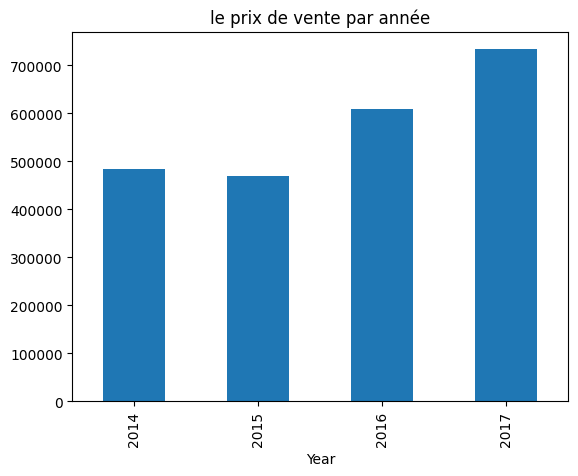

In [29]:
sales_year = df.groupby('Year')['Sales'].sum()
sales_year.plot(kind='bar', title='le prix de vente par année')

**Par ce graphe dessus**, 
- on a vue que pendant les trois années successives , la vente de ce magasin n'arrete pas de s'augmenter, car il se diminue un peu pour l'année 2015.

Ventes mensuelles

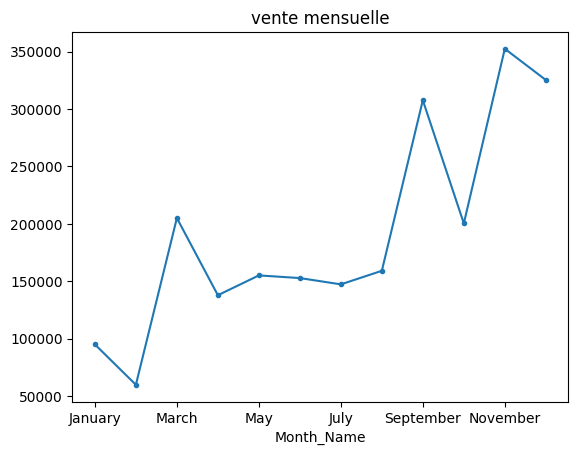

In [32]:
sales_month = df.groupby('Month_Name')['Sales'].sum()
sales_month = sales_month.reindex([
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
])

sales_month.plot(kind='line', marker='.', title='vente mensuelle')
plt.show()


**Par l'analyse de vente par mois**
- on a vue qu'on a beaucoup de clients pour le mois novembre, tandisque pour le mois de fevrier on n'a que peu de client.

### **7 - ANALYSE PAR CATÉGORIE & SOUS-CATÉGORIE**

- **vente par  categorie**

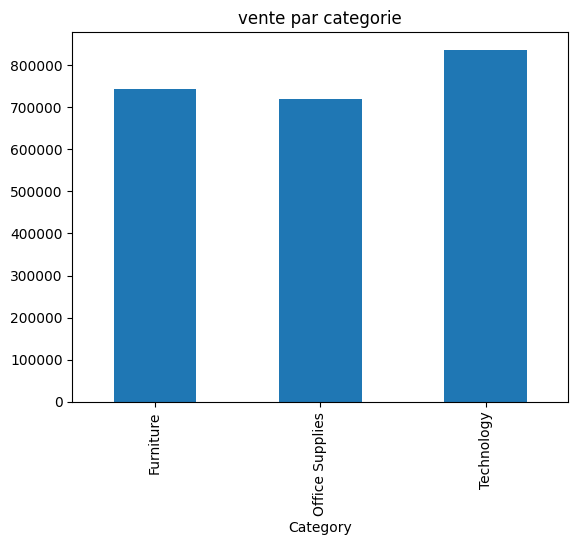

In [34]:
category_sales = df.groupby('Category')['Sales'].sum()

category_sales.plot(kind='bar', title='vente par categorie')
plt.show()

On peut conclure alors qu'on a vendue beaucoup de produit dans le categorie technologie.

---

- **profit par categorie**

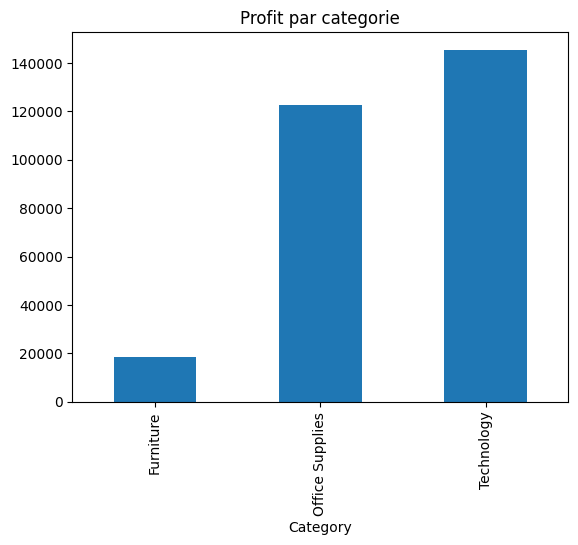

In [35]:
category_profit = df.groupby('Category')['Profit'].sum()
category_profit.plot(kind='bar', title='Profit par categorie')
plt.show()

Par rapport à ce graphe dessus, on peut conclure que:
- c'est toujours dans le categorie technologie qu'on a beaucoup de benefice. 
- Juste un peu de benefice pour le categories fourniture.

### **8 - TOP PRODUITS**

- **Top 10 produits par ventes**

On va voir ici les 10 produits les plus vendus pendant toutes l'années

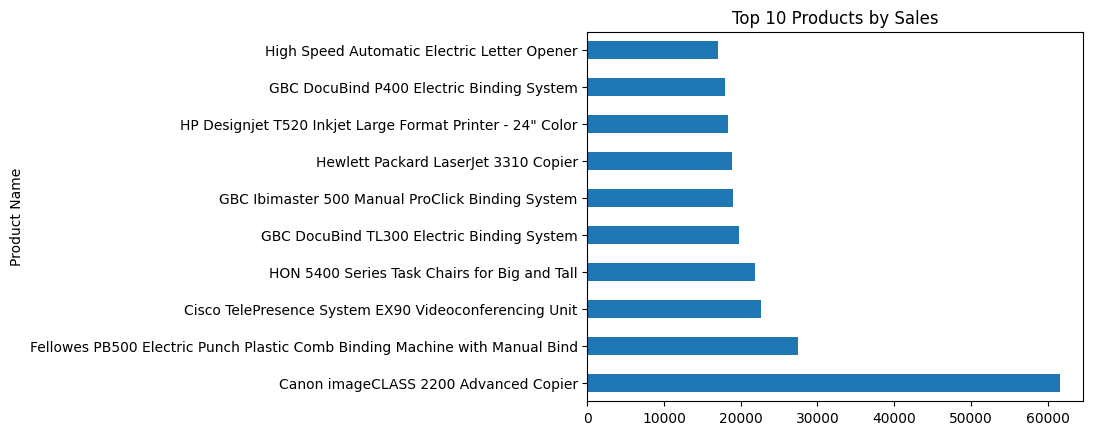

In [36]:
top_products_sales = (
    df.groupby('Product Name')['Sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products_sales.plot(kind='barh', title='Top 10 Products by Sales')
plt.show()


- **Produits non rentables**

Et maintenant on va voir tous les produits non rentables dans ce magasin.

In [40]:
unprofitable_products = df.groupby('Product Name')['Profit'].sum()
unprofitable_products = unprofitable_products[unprofitable_products < 0]
unprofitable_products.head()


Product Name
3.6 Cubic Foot Counter Height Office Refrigerator                 -872.0752
36X48 HARDFLOOR CHAIRMAT                                           -40.4914
3D Systems Cube Printer, 2nd Generation, White                    -467.9964
3M Replacement Filter for Office Air Cleaner for 20' x 33' Room    -20.4768
ARKON Windshield Dashboard Air Vent Car Mount Holder               -15.5940
Name: Profit, dtype: float64

### **9 - ANALYSE PAR CLIENT**

- **TOP 10 DE CLIENTS QUI FONT DE BON D'ACHAT**

On va voir ici les top 10 de clients qui font beaucoup d'achat dans ce magasin.

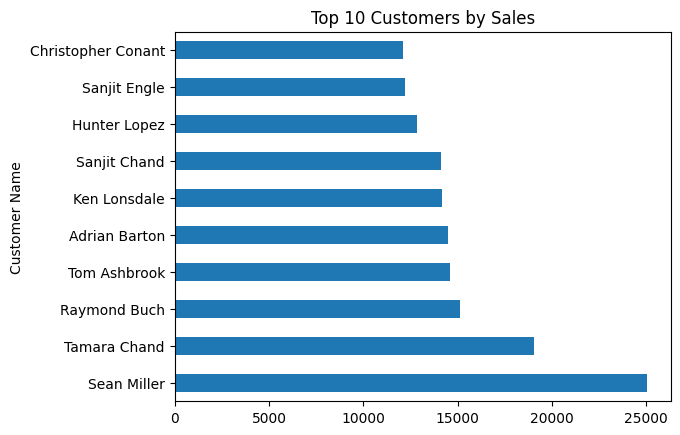

In [41]:
top_customers = (
    df.groupby('Customer Name')['Sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_customers.plot(kind='barh', title='Top 10 Customers by Sales')
plt.show()

- **Clients non rentables**

On va voir maintenant tous les clients non rentable.

In [42]:
unprofitable_customers = df.groupby('Customer Name')['Profit'].sum()
unprofitable_customers = unprofitable_customers[unprofitable_customers < 0]
unprofitable_customers.head()

Customer Name
Aaron Smayling   -253.5746
Adrian Hane        -2.3146
Alan Haines      -378.5509
Alex Avila       -362.8825
Alex Grayson       -5.1371
Name: Profit, dtype: float64

### **10 - ANALYSE GÉOGRAPHIQUE**

- **vente par region**

On va voir ici les regions qui font beaucoup d'achat.

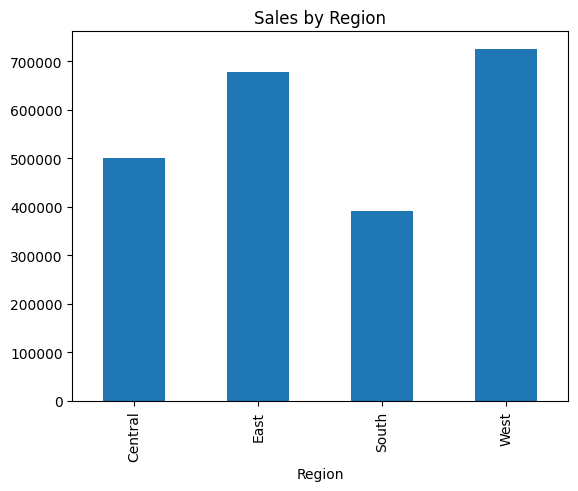

In [45]:
region_sales = df.groupby('Region')['Sales'].sum()

region_sales.plot(kind='bar', title='Sales by Region')
plt.show()

- **Profit par region**

On va voir ici la profit qu'on a obtenu par region.

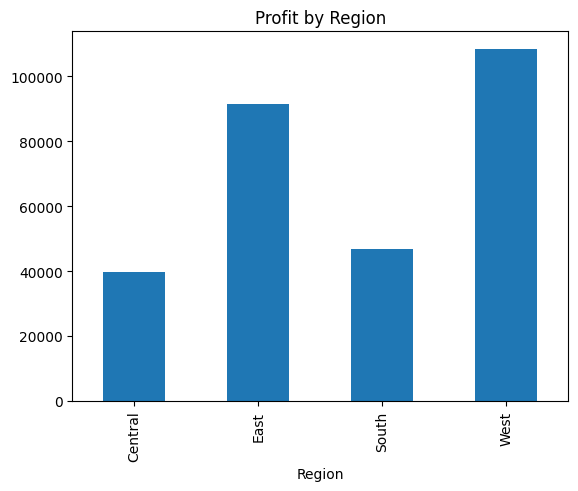

In [44]:
region_profit = df.groupby('Region')['Profit'].sum()
region_profit.plot(kind='bar', title='Profit by Region')
plt.show()

### **11 - ANALYSE DES REMISES**

On va voir globalement ici les profits par rapport aux etat de remise et non remise.

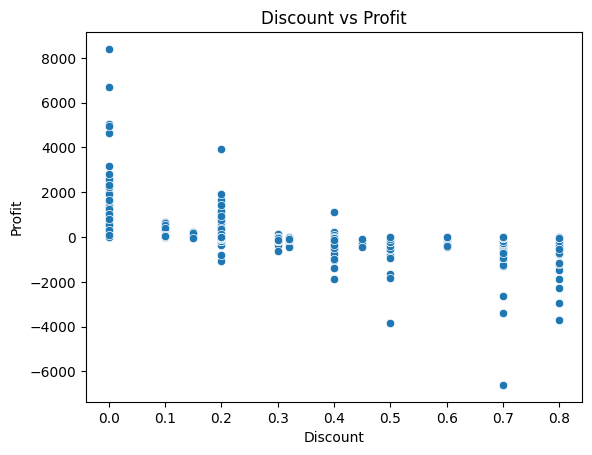

In [46]:
sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title('Discount vs Profit')
plt.show()

- **Profit moyen avec vs sans remise :**

In [47]:
df['Has_Discount'] = df['Discount'] > 0

df.groupby('Has_Discount')['Profit'].mean()


Has_Discount
False    66.900292
True     -6.657156
Name: Profit, dtype: float64

### **13 - ANALYSE DE RENTABILITÉ**

On va faire ici une analyse des produits rentable par categorie.

In [48]:
df['Profitable'] = df['Profit'] > 0

profitability_by_category = df.groupby('Category')['Profitable'].mean() * 100
profitability_by_category

Category
Furniture          64.780764
Office Supplies    84.815798
Technology         85.165133
Name: Profitable, dtype: float64

### **13 - ANALYSE LOGISTIQUE**

MBOLA MILA JERENA

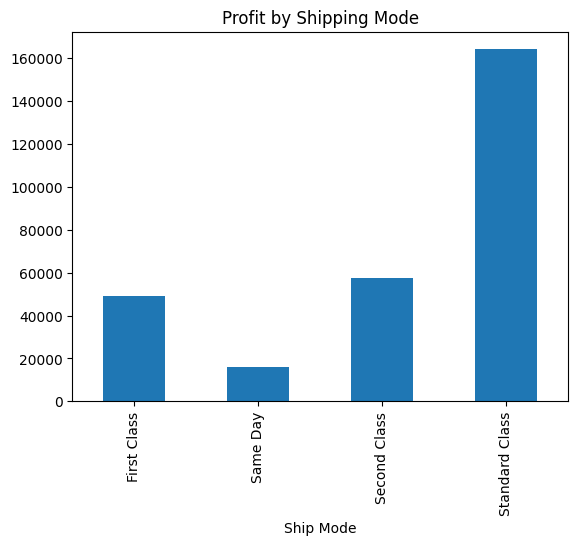

In [49]:
shipping_profit = df.groupby('Ship Mode')['Profit'].sum()
shipping_profit.plot(kind='bar', title='Profit by Shipping Mode')
plt.show()


### **14 - ANALYSE PARETO**

20% des produits génèrent 80% du CA

In [50]:
product_sales = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)
cumulative_sales = product_sales.cumsum() / product_sales.sum()

cumulative_sales.head(10)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          0.026815
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    0.038766
Cisco TelePresence System EX90 Videoconferencing Unit                          0.048621
HON 5400 Series Task Chairs for Big and Tall                                   0.058141
GBC DocuBind TL300 Electric Binding System                                     0.066771
GBC Ibimaster 500 Manual ProClick Binding System                               0.075052
Hewlett Packard LaserJet 3310 Copier                                           0.083253
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      0.091252
GBC DocuBind P400 Electric Binding System                                      0.099073
High Speed Automatic Electric Letter Opener                                    0.106486
Name: Sales, dtype: float64

---

### **15 -INSIGHTS FINAUX**

### Insights clés :
- La catégorie Technology est la plus rentable
- Les remises élevées réduisent fortement le profit
- Une petite partie des produits génère la majorité du CA


---

### **16 - EXPORT POUR POWER BI**

In [51]:
df.to_csv("../data/superstore_for_dashboard.csv", index=False)

### **Storytelling : Analyse des Données du Magasin Superstore**

#### **Introduction**
Nous avons analysé les données de vente du magasin Superstore pour comprendre les performances globales, identifier les tendances, et découvrir des opportunités d'amélioration. Cette analyse couvre plusieurs aspects, notamment les ventes, les profits, les catégories de produits, les clients, les régions, et les remises.

---

#### **1. Performance Globale**
- Le magasin a généré un chiffre d'affaires total de **2,297,200.86** avec un bénéfice de **286,397.02**, soit une marge bénéficiaire de **12.47%**.
- **793 clients** ont passé des commandes, avec un total de **n commandes uniques**.

---

#### **2. Analyse Temporelle**
- Les ventes ont augmenté au fil des années, avec une légère baisse en 2015.
- Novembre est le mois le plus performant en termes de ventes, tandis que février est le moins performant.

---

#### **3. Analyse par Catégorie**
- La catégorie **Technologie** est la plus rentable, générant le plus de ventes et de bénéfices.
- La catégorie **Fournitures** a des marges bénéficiaires faibles, nécessitant une attention particulière.

---

#### **4. Analyse des Produits**
- Les **10 produits les plus vendus** contribuent significativement au chiffre d'affaires.
- Certains produits sont **non rentables**, ce qui pourrait indiquer des problèmes de tarification ou de coût.

---

#### **5. Analyse des Clients**
- Les **10 meilleurs clients** génèrent une part importante des ventes.
- Certains clients sont **non rentables**, ce qui pourrait être dû à des remises excessives ou à des coûts élevés.

---

#### **6. Analyse Géographique**
- Certaines régions performent mieux que d'autres en termes de ventes et de bénéfices.
- Les régions moins performantes pourraient bénéficier d'une stratégie marketing ciblée.

---

#### **7. Impact des Remises**
- Les remises élevées réduisent considérablement les bénéfices.
- Les produits avec des remises importantes doivent être réévalués pour maximiser la rentabilité.

---

#### **8. Analyse de Rentabilité**
- La majorité des produits dans la catégorie **Technologie** sont rentables.
- Les catégories moins rentables nécessitent une optimisation des coûts et des prix.

---

#### **9. Analyse Logistique**
- Le mode d'expédition a un impact sur les bénéfices. Certains modes sont plus rentables que d'autres.

---

#### **10. Analyse Pareto**
- Environ **20% des produits** génèrent **80% du chiffre d'affaires**, confirmant le principe de Pareto.
- Ces produits clés doivent être priorisés dans les stratégies de vente et de marketing.

---

#### **Insights Clés**
- La catégorie **Technologie** est la plus rentable.
- Les remises élevées ont un impact négatif sur les bénéfices.
- Une petite partie des produits génère la majorité du chiffre d'affaires.

---

#### **Conclusion**
Cette analyse fournit des informations précieuses pour améliorer les performances du magasin Superstore. En optimisant les remises, en se concentrant sur les produits et clients rentables, et en ciblant les régions moins performantes, le magasin peut augmenter ses bénéfices et sa croissance.